Original notebook from (https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/)

In [1]:
import pandas
import matplotlib.pyplot as plt

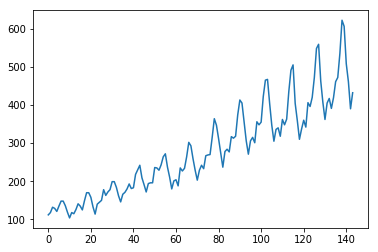

In [2]:
df = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(df)
plt.show()

We can see from the plot that there is some predicatility in the dataset, i.e. there is some kind of cycle.

We are going to keep things simple and work with the data as-is.
Normally, it is a good idea to investigate various data preparation techniques to rescale the data and to make it stationary.

# Multi-layer perceptron regression

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
import math

Using TensorFlow backend.


In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [12]:
df = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = df.values
print(dataset.shape)
dataset = dataset.astype('float32')
print(dataset.shape)

(144, 1)
(144, 1)


In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
# debugging
print(dataset[0:40,:].shape)
print(train.shape)

(40, 1)
(96, 1)


This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

We can now fit a Multilayer Perceptron model to the training data.

We use a simple network with 1 input, 1 hidden layer with 8 neurons and an output layer. The model is fit using mean squared error, which if we take the square root gives us an error score in the units of the dataset.

I tried a few rough parameters and settled on the configuration below, but by no means is the network listed  optimized.

In [7]:
model = Sequential()

In [8]:
model.add(Dense(8, input_dim=look_back,activation='relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.fit(trainX, trainY, batch_size=2, epochs=200, verbose=0)

In [16]:
# Estimate model performance
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))

Train Score: 531.71 MSE (23.06 RMSE)


In [17]:
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Test Score: 2355.07 MSE (48.53 RMSE)


# Generate predictions and plotting

In [18]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [20]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

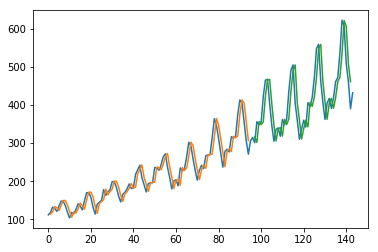

In [21]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()